# Imbalanced-Learn

Kurangi class setosa menjadi 15 data
Implementasikan ADASYN untuk menyeimbangkan data
Sedang 1% - 20%

Membandingkan hasil klasifikasi dataset yang tidak balanced (15 50 50) dengan balanced yang sudah dipreprocessing (50 50 50)

In [25]:
import nbimporter
from koneksi import load_data

df = load_data()

koneksi.ipynb:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  "    SELECT \n",
koneksi.ipynb:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  "    SELECT \n",


## Distribusi Awal Species

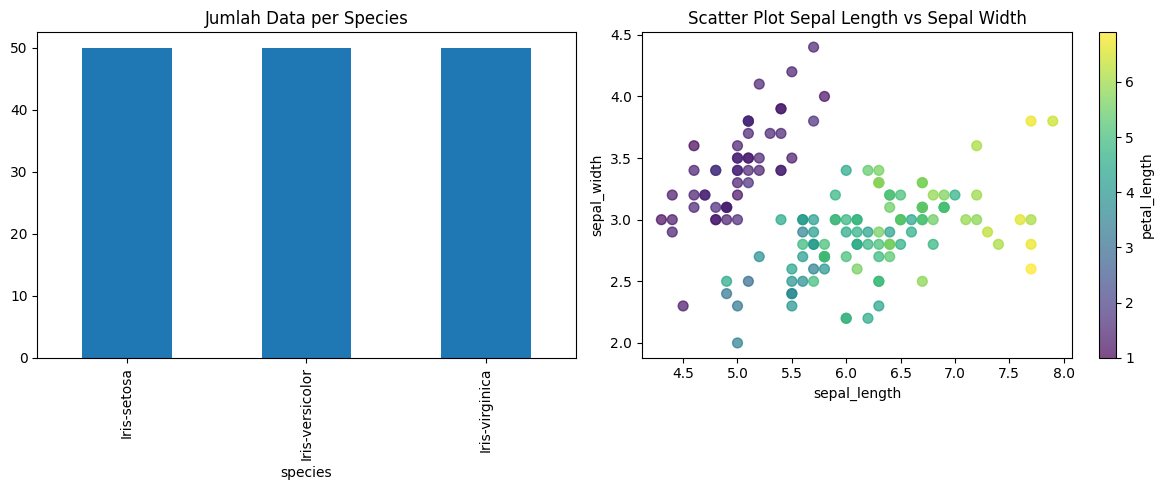

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Bar chart jumlah species
df['species'].value_counts().plot(
    kind='bar',
    ax=axes[0],
    title='Jumlah Data per Species'
)

# Plot 2: Scatter plot sepal_length vs sepal_width
df.plot.scatter(
    x='sepal_length',
    y='sepal_width',
    c='petal_length',
    cmap='viridis',
    s=50,
    alpha=0.7,
    title='Scatter Plot Sepal Length vs Sepal Width',
    ax=axes[1]
)

plt.tight_layout()
plt.show()

## Imbalanced Data Species Iris-setosa

(115, 6)

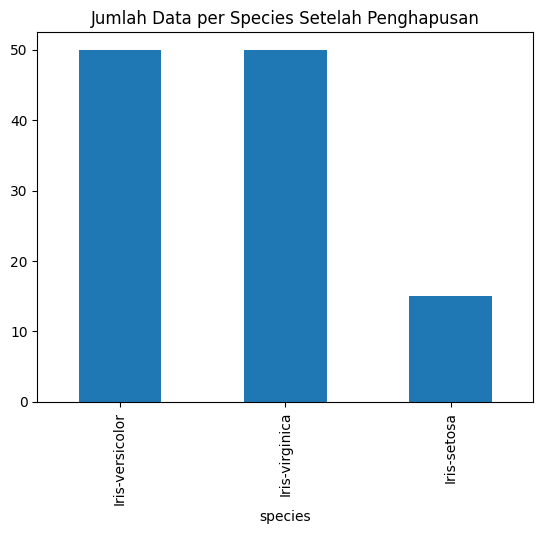

In [27]:
# Cari baris dengan species = "Iris-setosa"
setosa_idx = df[df["species"] == "Iris-setosa"].index

# Ambil 35 baris pertama
to_drop = setosa_idx[:35]

# Hapus 35 data Iris-setosa dari DataFrame
df = df.drop(to_drop).reset_index(drop=True)

df['species'].value_counts().plot(kind='bar', title='Jumlah Data per Species Setelah Penghapusan')
df.shape

### Visualisasi PCA dan LDA dari dataset Imbalanced (15 50 50)

explained variance ratio (first two components): [0.99866635 0.00106713]


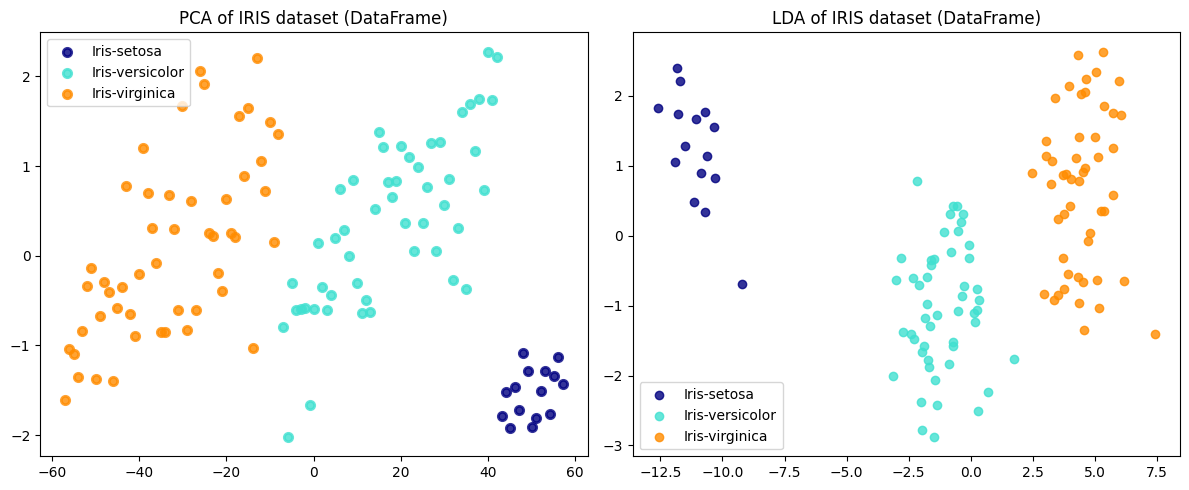

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Ambil fitur numerik
X = df.drop(columns=["species"]).values

# Encode species ke bentuk angka
le = LabelEncoder()
y = le.fit_transform(df["species"])

# Nama target
target_names = le.classes_

# PCA & LDA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Variance explained oleh PCA
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

# --- Plot PCA & LDA berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom

colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Plot PCA di kiri
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[0].scatter(
        X_r[y == i, 0], X_r[y == i, 1],
        color=color, alpha=0.8, lw=lw, label=target_name
    )
axes[0].legend(loc="best", shadow=False, scatterpoints=1)
axes[0].set_title("PCA of IRIS dataset (DataFrame)")

# Plot LDA di kanan
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[1].scatter(
        X_r2[y == i, 0], X_r2[y == i, 1],
        alpha=0.8, color=color, label=target_name
    )
axes[1].legend(loc="best", shadow=False, scatterpoints=1)
axes[1].set_title("LDA of IRIS dataset (DataFrame)")

plt.tight_layout()
plt.show()


### Klasifikasi dengan Imbalanced Data (15 50 50)

           Model  Accuracy  Setosa Precision  Versicolor Precision  \
0  Random Forest  1.000000               1.0                  1.00   
1            SVM  0.857143               0.0                  0.75   
2    Naive Bayes  1.000000               1.0                  1.00   

   Virginica Precision  
0                  1.0  
1                  1.0  
2                  1.0  


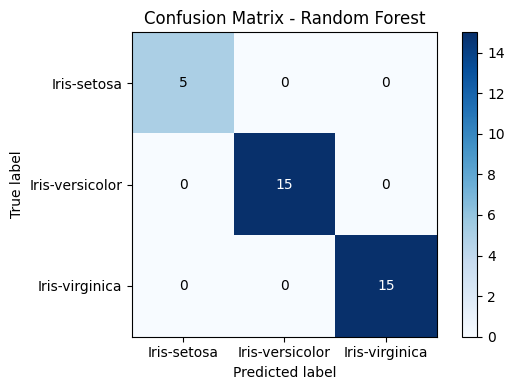

In [29]:
# =========================
# Klasifikasi Iris Dataset
# =========================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Split data (X, y sudah didefinisikan di cell sebelumnya)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True, zero_division=0)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Setosa Precision": report[target_names[0]]["precision"],
        "Versicolor Precision": report[target_names[1]]["precision"],
        "Virginica Precision": report[target_names[2]]["precision"]
    })

# Tampilkan hasil performa dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df)

# Confusion Matrix untuk Random Forest
cm = confusion_matrix(y_test, models["Random Forest"].predict(X_test))

fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar(im)
ax.set(
    xticks=np.arange(len(target_names)),
    yticks=np.arange(len(target_names)),
    xticklabels=target_names,
    yticklabels=target_names,
    ylabel="True label",
    xlabel="Predicted label",
    title="Confusion Matrix - Random Forest"
)
for i in range(len(target_names)):
    for j in range(len(target_names)):
        ax.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )
plt.tight_layout()
plt.show()


In [30]:
allReport = {}

#### Bagging Clasifier (SVM dan Naive Baiyes)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 

Ditampilkan mana skenario yang menghasilkan akurasi tinggi

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

print("Sebelum melakukan ADASYN (Distribusi Data tidak normal)")

print("Pure Classifier Results:")

PureRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
PureRandomForest.fit(X_train, y_train)
y_pred_PureRF = PureRandomForest.predict(X_test)
akurasi_pure_rf = accuracy_score(y_test, y_pred_PureRF)
print("Pure Random Forest Accuracy:", akurasi_pure_rf)
report_pure_rf = classification_report(y_test, y_pred_PureRF, target_names=target_names, output_dict=True, zero_division=0)
allReport["Before ADASYN Pure Random Forest"] = [akurasi_pure_rf,report_pure_rf]

PureSVM = SVC(kernel="rbf", random_state=42)
PureSVM.fit(X_train, y_train)
akurasi_pure_svm = accuracy_score(y_test, PureSVM.predict(X_test))
print("Pure SVM Accuracy:", akurasi_pure_svm)
report_pure_svm = classification_report(y_test, PureSVM.predict(X_test), target_names=target_names, output_dict=True, zero_division=0)
allReport["Before ADASYN Pure SVM"] = [akurasi_pure_svm,report_pure_svm]

PureNaiveBayes = GaussianNB()
PureNaiveBayes.fit(X_train, y_train)
akurasi_pure_nb = accuracy_score(y_test, PureNaiveBayes.predict(X_test))
print("Pure Naive Bayes Accuracy:", akurasi_pure_nb)
report_pure_nb = classification_report(y_test, PureNaiveBayes.predict(X_test), target_names=target_names, output_dict=True, zero_division=0)
allReport["Before ADASYN Pure Naive Bayes"] = [akurasi_pure_nb,report_pure_nb]

print("\nBagging Classifier Results:")

# Bagging dengan SVM
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)
bagging_svm.fit(X_train, y_train)
y_pred_svm = bagging_svm.predict(X_test)
akurasi_bagging_svm = accuracy_score(y_test, y_pred_svm)
print("Bagging SVM Accuracy:", akurasi_bagging_svm)
report_bagging_svm = classification_report(y_test, y_pred_svm, target_names=target_names, output_dict=True,zero_division=0)
allReport["Before ADASYN Bagging SVM"] = [akurasi_bagging_svm,report_bagging_svm]

# Bagging dengan Naive Bayes
bagging_nb = BaggingClassifier(estimator=GaussianNB(), n_estimators=10, random_state=0)
bagging_nb.fit(X_train, y_train)
y_pred_nb = bagging_nb.predict(X_test)
akurasi_bagging_nb = accuracy_score(y_test, y_pred_nb)
print("Bagging Naive Bayes Accuracy:", akurasi_bagging_nb)
report_bagging_nb = classification_report(y_test, y_pred_nb, target_names=target_names,output_dict=True, zero_division=0)
allReport["Before ADASYN Bagging Naive Bayes"] = [akurasi_bagging_nb,report_bagging_nb]

# Bagging dengan Decision Tree
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
akurasi_bagging_dt = accuracy_score(y_test, y_pred_dt)
print("Bagging Decision Tree Accuracy:", akurasi_bagging_dt)
report_bagging_dt = classification_report(y_test, y_pred_dt, target_names=target_names,output_dict=True, zero_division=0)
allReport["Before ADASYN Bagging Decision Tree"] = [akurasi_bagging_dt,report_bagging_dt]

Sebelum melakukan ADASYN (Distribusi Data tidak normal)
Pure Classifier Results:
Pure Random Forest Accuracy: 1.0
Pure SVM Accuracy: 0.8571428571428571
Pure Naive Bayes Accuracy: 1.0

Bagging Classifier Results:
Bagging SVM Accuracy: 0.8571428571428571
Bagging Naive Bayes Accuracy: 1.0
Bagging Decision Tree Accuracy: 1.0


## ADASYN

### Melakukan generate data dengan ADASYN

Jumlah data Iris-setosa sebelum: 15
Jumlah data Iris-setosa sesudah: 50


<Axes: title={'center': 'Jumlah Data per Species Setelah Generate'}, xlabel='species'>

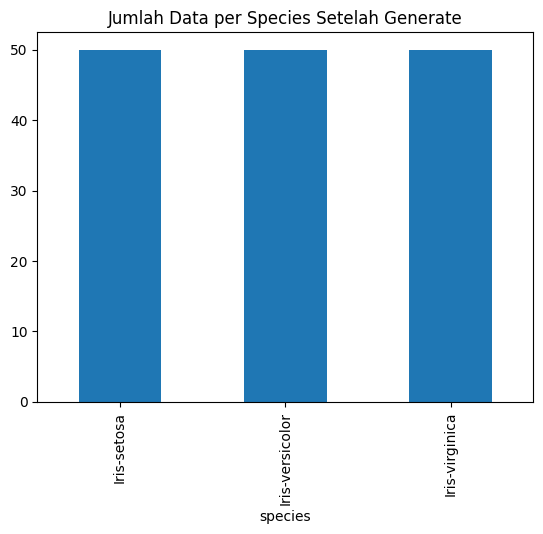

In [32]:
import pandas as pd


# Hitung jumlah Iris-setosa
count_setosa = df[df["species"] == "Iris-setosa"].shape[0]
print("Jumlah data Iris-setosa sebelum:", count_setosa)

# Target jumlah data
target = 50

if count_setosa < target:
    # Ambil data 'Iris-setosa' sebagai sumber
    setosa_data = df[df["species"] == "Iris-setosa"]
    
    # Tentukan berapa data tambahan
    need = target - count_setosa
    
    # Generate data tambahan dengan sampling (boleh duplikat karena replace=True)
    new_data = setosa_data.sample(n=need, replace=True, random_state=42)
    
    # Gabungkan ke DataFrame asli
    df_extended = pd.concat([df, new_data], ignore_index=True)
    
    print("Jumlah data Iris-setosa sesudah:", df_extended[df_extended["species"] == "Iris-setosa"].shape[0])
else:
    df_extended = df.copy()
    print("Jumlah sudah >= 50, tidak perlu ditambah.")

# Simpan hasil jika perlu
# df_extended.to_csv("iris_extended.csv", index=False)
df = df_extended.copy()
df_extended['species'].value_counts().plot(kind='bar', title='Jumlah Data per Species Setelah Generate')


### Visualisasi PCA dan LDA dari dataset generate

explained variance ratio (first two components): [9.98838955e-01 9.35187518e-04]


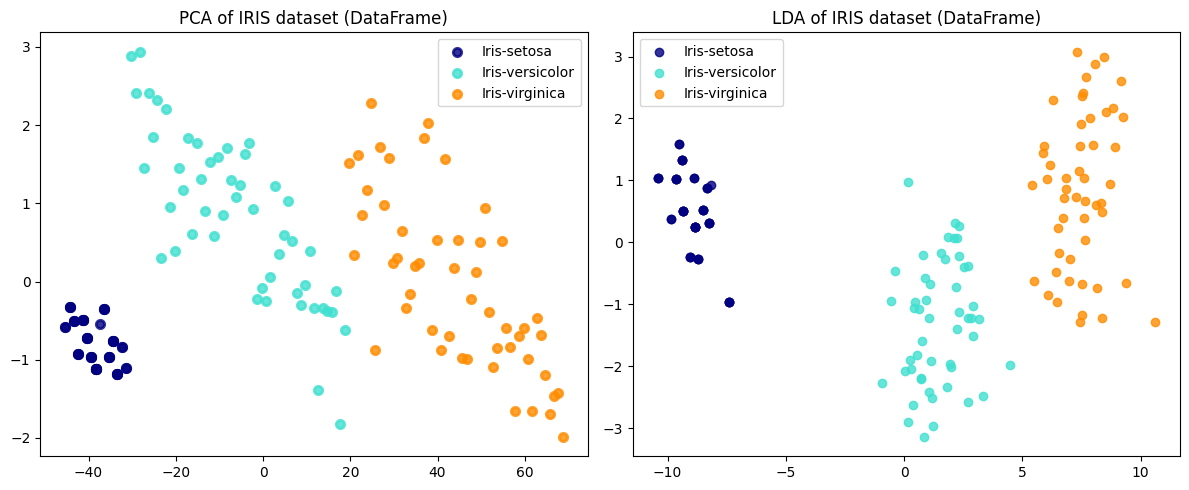

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Ambil fitur numerik
X = df.drop(columns=["species"]).values

# Encode species ke bentuk angka
le = LabelEncoder()
y = le.fit_transform(df["species"])

# Nama target
target_names = le.classes_

# PCA & LDA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Variance explained oleh PCA
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

# --- Plot PCA & LDA berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom

colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Plot PCA di kiri
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[0].scatter(
        X_r[y == i, 0], X_r[y == i, 1],
        color=color, alpha=0.8, lw=lw, label=target_name
    )
axes[0].legend(loc="best", shadow=False, scatterpoints=1)
axes[0].set_title("PCA of IRIS dataset (DataFrame)")

# Plot LDA di kanan
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[1].scatter(
        X_r2[y == i, 0], X_r2[y == i, 1],
        alpha=0.8, color=color, label=target_name
    )
axes[1].legend(loc="best", shadow=False, scatterpoints=1)
axes[1].set_title("LDA of IRIS dataset (DataFrame)")

plt.tight_layout()
plt.show()


### Hasil Klasifikasi setelah ADASYN

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



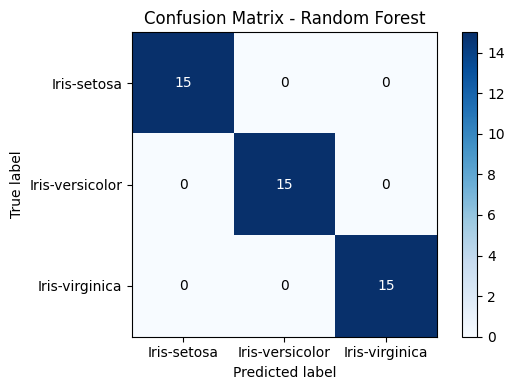

In [34]:
# =================================
# Klasifikasi Iris Dataset (Setelah Penanganan Imbalance)
# =================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Split data (X, y sudah didefinisikan di cell sebelumnya)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Buat model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix manual dengan matplotlib
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

# Tambahkan colorbar
plt.colorbar(im)

# Label axis
ax.set(
    xticks=np.arange(len(target_names)),
    yticks=np.arange(len(target_names)),
    xticklabels=target_names,
    yticklabels=target_names,
    ylabel="True label",
    xlabel="Predicted label",
    title="Confusion Matrix - Random Forest"
)

# Tampilkan angka di setiap kotak
for i in range(len(target_names)):
    for j in range(len(target_names)):
        ax.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.tight_layout()
plt.show()


#### Menggunakan Bagging Classifier (SVM dan Naive Baiyes)

In [35]:
print("Setelah melakukan ADASYN (Distribusi Data tidak normal)")

print("Pure Classifier Results:")

PureRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
PureRandomForest.fit(X_train, y_train)
y_pred_PureRF = PureRandomForest.predict(X_test)
akurasi_pure_rf = accuracy_score(y_test, y_pred_PureRF)
print("Pure Random Forest Accuracy:", akurasi_pure_rf)
report_pure_rf = classification_report(y_test, y_pred_PureRF, target_names=target_names, output_dict=True, zero_division=0)
allReport["Setelah ADASYN Pure Random Forest"] = [akurasi_pure_rf,report_pure_rf]

PureSVM = SVC(kernel="rbf", random_state=42)
PureSVM.fit(X_train, y_train)
akurasi_pure_svm = accuracy_score(y_test, PureSVM.predict(X_test))
print("Pure SVM Accuracy:", akurasi_pure_svm)
report_pure_svm = classification_report(y_test, PureSVM.predict(X_test), target_names=target_names, output_dict=True, zero_division=0)
allReport["Setelah ADASYN Pure SVM"] = [akurasi_pure_svm,report_pure_svm]

PureNaiveBayes = GaussianNB()
PureNaiveBayes.fit(X_train, y_train)
akurasi_pure_nb = accuracy_score(y_test, PureNaiveBayes.predict(X_test))
print("Pure Naive Bayes Accuracy:", akurasi_pure_nb)
report_pure_nb = classification_report(y_test, PureNaiveBayes.predict(X_test), target_names=target_names, output_dict=True, zero_division=0)
allReport["Setelah ADASYN Pure Naive Bayes"] = [akurasi_pure_nb,report_pure_nb]

print("\nBagging Classifier Results:")

# Bagging dengan SVM
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)
bagging_svm.fit(X_train, y_train)
y_pred_svm = bagging_svm.predict(X_test)
akurasi_bagging_svm = accuracy_score(y_test, y_pred_svm)
print("Bagging SVM Accuracy:", akurasi_bagging_svm)
report_bagging_svm = classification_report(y_test, y_pred_svm, target_names=target_names, output_dict=True, zero_division=0)
allReport["Setelah ADASYN Bagging SVM"] = [akurasi_bagging_svm,report_bagging_svm]

# Bagging dengan Naive Bayes
bagging_nb = BaggingClassifier(estimator=GaussianNB(), n_estimators=10, random_state=0)
bagging_nb.fit(X_train, y_train)
y_pred_nb = bagging_nb.predict(X_test)
akurasi_bagging_nb = accuracy_score(y_test, y_pred_nb)
print("Bagging Naive Bayes Accuracy:", akurasi_bagging_nb)
report_bagging_nb = classification_report(y_test, y_pred_nb, target_names=target_names, output_dict=True, zero_division=0)
allReport["Setelah ADASYN Bagging Naive Bayes"] = [akurasi_bagging_nb,report_bagging_nb]

# Bagging dengan Decision Tree
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
akurasi_bagging_dt = accuracy_score(y_test, y_pred_dt)
print("Bagging Decision Tree Accuracy:", akurasi_bagging_dt)
report_bagging_dt = classification_report(y_test, y_pred_dt, target_names=target_names, output_dict=True, zero_division=0)
allReport["Setelah ADASYN Bagging Decision Tree"] = [akurasi_bagging_dt,report_bagging_dt]

Setelah melakukan ADASYN (Distribusi Data tidak normal)
Pure Classifier Results:
Pure Random Forest Accuracy: 1.0
Pure SVM Accuracy: 0.9111111111111111
Pure Naive Bayes Accuracy: 0.9777777777777777

Bagging Classifier Results:
Bagging SVM Accuracy: 0.9333333333333333
Bagging Naive Bayes Accuracy: 0.9777777777777777
Bagging Decision Tree Accuracy: 1.0


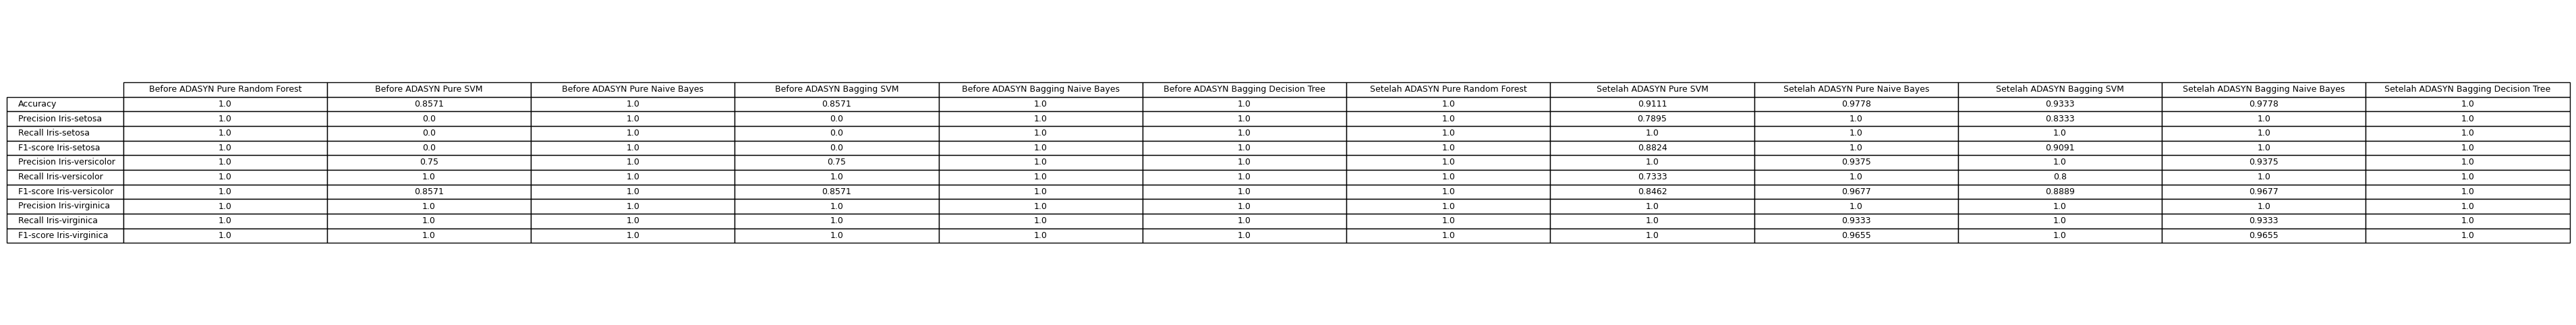

In [36]:
# Ekstrak hasil jadi tabel
table_data = {}

for model, values in allReport.items():
    metrics_dict = {}
    acc = values[0]

    # ambil dict classification_report kalau tersedia
    if isinstance(values[1], dict):
        report = values[1]
        metrics_dict["Accuracy"] = acc
        for cls in ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]:
            if cls in report:
                metrics_dict[f"Precision {cls}"] = report[cls]["precision"]
                metrics_dict[f"Recall {cls}"] = report[cls]["recall"]
                metrics_dict[f"F1-score {cls}"] = report[cls]["f1-score"]
    else:
        metrics_dict["Accuracy"] = acc

    table_data[model] = metrics_dict

# Buat DataFrame & batasi 4 angka di belakang koma
df = pd.DataFrame(table_data).round(4)

# Plot jadi tabel (gambar)
fig, ax = plt.subplots(figsize=(36, 6))
ax.axis('off')

table = ax.table(cellText=df.values,
                 rowLabels=df.index,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

# Styling tabel
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.3, 1.3)

# plt.show()
# plt.savefig("result_table.png", bbox_inches="tight", dpi=300)
plt.show()
